# Return prediction

## Problem. 
The problem of return prediction is one of the current points of interest in the financial world. The aim of this project is to forecast the returns of Meta stock based on the last 7 days of price and volume data for three stocks from the same industry – Amazon, Intel and Meta itself. 


## Model and Data.
One of the most widely used models for forecasting of time series data is Long-Short-Term-Memory model. It is a recurring neural network model, that can store information over some period of time. This feature allows the model to account for patterns in time series data, which makes it a good model for returns predictions. In order to work with LSTM, tensorflow and keras libraries in Python are used. Tensorflow will be used for creating generators when working with time series data, while keras will help to build NN models.
The data for this study is taken from Nasdaq website and includes 5 years of daily stock prices and volumes for three chosen assets. 

## Step 1. Downloading libraries and data

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
# import keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
amzn = pd.read_csv('data/hd_amzn.csv')   
intc = pd.read_csv('data/hd_intc.csv')   
meta = pd.read_csv('data/hd_meta.csv')  

## Step 2. Data cleaning

Inspect the data and check for missing values

In [3]:
print(amzn.head())
print(intc.head())
print(meta.head())

         Date Close/Last     Volume     Open       High      Low
0  09/25/2024    $192.53   26391140  $193.75  $193.9498  $192.16
1  09/24/2024    $193.96   43478930  $194.27    $195.37  $190.13
2  09/23/2024    $193.88   36993110  $191.64    $194.45  $190.57
3  09/20/2024    $191.60  100378600  $190.23    $191.84  $187.41
4  09/19/2024    $189.87   39543170  $190.04    $190.99  $188.47
         Date Close/Last     Volume    Open     High      Low
0  09/25/2024     $23.54  117013400  $22.80  $24.055   $22.73
1  09/24/2024     $22.81  113082500  $22.53  $23.105  $22.285
2  09/23/2024     $22.56  184439100  $22.43   $22.82   $22.03
3  09/20/2024     $21.84  260377900  $20.89   $23.14   $20.35
4  09/19/2024     $21.14   99829170  $21.28   $21.69   $21.03
         Date Close/Last    Volume     Open       High        Low
0  09/25/2024    $568.31  16543350  $564.05    $576.88    $563.72
1  09/24/2024    $563.33  12992960  $566.68   $567.745    $554.19
2  09/23/2024    $564.41  12830670  $569

In [4]:
print(amzn.isnull().sum())
print(intc.isnull().sum())
print(meta.isnull().sum())

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


In [5]:
from prep_data import clean_data

amzn_cl = clean_data(amzn)
intc_cl = clean_data(intc)
meta_cl = clean_data(meta)

c:\Study\prjcts\bd\return_prediction\prep_data.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Close/Last"] = df["Close/Last"].astype(str).str.replace('$', '')


## Step 3. Data preparation


Calculate returns

In [6]:
from prep_data import generate_return

amzn_cl["Return"] = generate_return(amzn_cl)
intc_cl["Return"] = generate_return(intc_cl)
meta_cl["Return"] = generate_return(meta_cl)

Drop the first row that has NaN value

In [7]:
amzn_cl = amzn_cl.dropna()
intc_cl = intc_cl.dropna()
meta_cl = meta_cl.dropna()

Create forecasting variable

In [8]:
for i in meta_cl["Return"]:
   meta_cl['label'] = np.where(meta_cl["Return"] > 0, 1, 0)

In [9]:
amzn_cl = amzn_cl.rename({"Price": "amzn_price", "Volume": "amzn_volume", "Return": "amzn_return"}, axis=1)
intc_cl = intc_cl.rename({"Price": "intc_price", "Volume": "intc_volume", "Return": "intc_return"}, axis=1)
meta_cl = meta_cl.rename({"Price": "meta_price", "Volume": "meta_volume", "Return": "meta_return"}, axis=1)

Combining data into one dataframe, dropping duplicating "Date" columns

In [10]:
data = pd.concat([amzn_cl, intc_cl, meta_cl], axis=1)
data = data.T.drop_duplicates().T

In [11]:
data.head()

,Date,amzn_price,amzn_volume,amzn_return,intc_price,intc_volume,intc_return,meta_price,meta_volume,meta_return,label
1,09/24/2024,193.96,43478930,0.007427,22.81,113082500,-0.031011,563.33,12992960,-0.008763,0
2,09/23/2024,193.88,36993110,-0.000412,22.56,184439100,-0.01096,564.41,12830670,0.001917,1
3,09/20/2024,191.6,100378600,-0.01176,21.84,260377900,-0.031915,561.35,22066820,-0.005422,0
4,09/19/2024,189.87,39543170,-0.009029,21.14,99829170,-0.032051,559.1,15646950,-0.004008,0
5,09/18/2024,186.43,34448130,-0.018118,20.77,118727900,-0.017502,537.95,10323540,-0.037829,0


Split data into test, train and validation sets 

In [12]:
data_train_val, data_test = train_test_split(data, test_size=0.20, shuffle=False)
data_train, data_val = train_test_split(data_train_val, test_size=0.25, shuffle=False)

Standardising returns

In [13]:
from prep_data import standardise_return

data_test['std_return_amzn'] = standardise_return(data_test["amzn_return"])
data_test['std_return_intc'] = standardise_return(data_test["intc_return"])
data_test['std_return_meta'] = standardise_return(data_test["meta_return"])

data_train['std_return_amzn'] = standardise_return(data_train["amzn_return"])
data_train['std_return_intc'] = standardise_return(data_train["intc_return"])
data_train['std_return_meta'] = standardise_return(data_train["meta_return"])

data_val['std_return_amzn'] = standardise_return(data_val["amzn_return"])
data_val['std_return_intc'] = standardise_return(data_val["intc_return"])
data_val['std_return_meta'] = standardise_return(data_val["meta_return"])

Standardising volume

In [14]:
from prep_data import standardise_volume

data_test['std_volume_amzn'] = standardise_volume(data_test["amzn_volume"])
data_test['std_volume_intc'] = standardise_volume(data_test["intc_volume"])
data_test['std_volume_meta'] = standardise_volume(data_test["meta_volume"])

data_train['std_volume_amzn'] = standardise_volume(data_train["amzn_volume"])
data_train['std_volume_intc'] = standardise_volume(data_train["intc_volume"])
data_train['std_volume_meta'] = standardise_volume(data_train["meta_volume"])

data_val['std_volume_amzn'] = standardise_volume(data_val["amzn_volume"])
data_val['std_volume_intc'] = standardise_volume(data_val["intc_volume"])
data_val['std_volume_meta'] = standardise_volume(data_val["meta_volume"])

In [15]:
data_train = data_train.dropna()
data_val = data_val.dropna()
data_test = data_test.dropna()

In [16]:
data_train.dtypes

Date               object
amzn_price         object
amzn_volume        object
amzn_return        object
intc_price         object
intc_volume        object
intc_return        object
meta_price         object
meta_volume        object
meta_return        object
label              object
std_return_amzn    object
std_return_intc    object
std_return_meta    object
std_volume_amzn    object
std_volume_intc    object
std_volume_meta    object
dtype: object

In [17]:
convert_dict = {'std_volume_amzn': float, 'std_volume_intc': float, 'std_volume_meta': float, 
                'std_return_amzn': float, 'std_return_intc': float, 'std_return_meta': float
                }
data_train = data_train.astype(convert_dict)
data_val = data_val.astype(convert_dict)
data_test = data_test.astype(convert_dict)

## Step 4. Model architecture and testing

Creating training, validation, and testing generators.
Setting an input as standardised returns and standardised volume for all three stocks; setting the output as the label variable for Meta.
Length - 7 days, as per problem description.
Batch size - 32.

In [67]:
train_generator = TimeseriesGenerator(
    data_train[
        ['std_return_amzn', 'std_volume_amzn', 'std_return_intc', 'std_volume_intc', 'std_return_meta', 'std_volume_meta']
    ].values, data_train['label'].values, length=7, batch_size=32)
val_generator = TimeseriesGenerator(
    data_val[
        ['std_return_amzn', 'std_volume_amzn', 'std_return_intc', 'std_volume_intc', 'std_return_meta', 'std_volume_meta']
    ].values, data_val['label'].values, length=7, batch_size=32)
test_generator = TimeseriesGenerator(
    data_test[
        ['std_return_amzn', 'std_volume_amzn', 'std_return_intc', 'std_volume_intc', 'std_return_meta', 'std_volume_meta']
    ].values, data_test['label'].values, length=7, batch_size=32)

Creating a model

In [68]:
from model import model_fn
from model import random_search

Using cross validation to choose the best parameters

In [70]:
search_space = {'lstm_size': np.linspace(10, 150, 5, dtype=int),
                'dropout': np.linspace(0, 0.6, 5),
                'learning_rate': np.linspace(0.0001, 0.01, 5)}
iterations = 25

In [71]:
results, best_model, history = random_search(model_fn, search_space, iterations, 'search_new')

Epoch 1/100


<ipython-input-68-024afe822ad6>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


22/22 [==============================] - 4s 47ms/step - loss: 0.7030 - accuracy: 0.4677 - val_loss: 0.6940 - val_accuracy: 0.5204
Epoch 2/100
22/22 [==============================] - 0s 19ms/step - loss: 0.6901 - accuracy: 0.5567 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 3/100
22/22 [==============================] - 0s 19ms/step - loss: 0.6833 - accuracy: 0.5581 - val_loss: 0.6915 - val_accuracy: 0.5357
Epoch 4/100
22/22 [==============================] - 0s 18ms/step - loss: 0.6811 - accuracy: 0.5839 - val_loss: 0.6923 - val_accuracy: 0.5153
Epoch 5/100
22/22 [==============================] - 0s 17ms/step - loss: 0.6776 - accuracy: 0.5725 - val_loss: 0.6884 - val_accuracy: 0.5714
Epoch 6/100
22/22 [==============================] - 0s 21ms/step - loss: 0.6789 - accuracy: 0.5710 - val_loss: 0.6957 - val_accuracy: 0.5102
Epoch 7/100
22/22 [==============================] - 0s 18ms/step - loss: 0.6676 - accuracy: 0.5911 - val_loss: 0.6952 - val_accuracy: 0.5357
Epoch 8/100
22/22 

Epoch 17/100
22/22 [==============================] - 1s 29ms/step - loss: 0.5180 - accuracy: 0.7217 - val_loss: 0.8787 - val_accuracy: 0.5255
Epoch 18/100
22/22 [==============================] - 1s 23ms/step - loss: 0.4763 - accuracy: 0.7618 - val_loss: 0.9603 - val_accuracy: 0.5153
Epoch 19/100
22/22 [==============================] - 1s 28ms/step - loss: 0.4707 - accuracy: 0.7633 - val_loss: 0.9983 - val_accuracy: 0.5306
Epoch 20/100
22/22 [==============================] - 1s 28ms/step - loss: 0.4401 - accuracy: 0.7791 - val_loss: 1.0041 - val_accuracy: 0.5051
Epoch 1/100
22/22 [==============================] - 3s 38ms/step - loss: 0.6993 - accuracy: 0.5036 - val_loss: 0.6960 - val_accuracy: 0.4745
Epoch 2/100
22/22 [==============================] - 0s 10ms/step - loss: 0.6905 - accuracy: 0.5495 - val_loss: 0.6933 - val_accuracy: 0.5153
Epoch 3/100
22/22 [==============================] - 0s 10ms/step - loss: 0.6900 - accuracy: 0.5595 - val_loss: 0.6910 - val_accuracy: 0.5357
Ep

22/22 [==============================] - 0s 8ms/step - loss: 0.6838 - accuracy: 0.5897 - val_loss: 0.6969 - val_accuracy: 0.4847
Epoch 14/100
22/22 [==============================] - 0s 7ms/step - loss: 0.6759 - accuracy: 0.5796 - val_loss: 0.6977 - val_accuracy: 0.4796
Epoch 15/100
22/22 [==============================] - 0s 8ms/step - loss: 0.6809 - accuracy: 0.5667 - val_loss: 0.6992 - val_accuracy: 0.4796
Epoch 1/100
22/22 [==============================] - 4s 54ms/step - loss: 0.7104 - accuracy: 0.5036 - val_loss: 0.7041 - val_accuracy: 0.5051
Epoch 2/100
22/22 [==============================] - 1s 27ms/step - loss: 0.6954 - accuracy: 0.5395 - val_loss: 0.6978 - val_accuracy: 0.5000
Epoch 3/100
22/22 [==============================] - 1s 27ms/step - loss: 0.6935 - accuracy: 0.5337 - val_loss: 0.6944 - val_accuracy: 0.5102
Epoch 4/100
22/22 [==============================] - 0s 22ms/step - loss: 0.6811 - accuracy: 0.5509 - val_loss: 0.6953 - val_accuracy: 0.5051
Epoch 5/100
22/22 [

Epoch 17/100
22/22 [==============================] - 0s 16ms/step - loss: 0.4428 - accuracy: 0.7862 - val_loss: 0.8660 - val_accuracy: 0.5714
Epoch 18/100
22/22 [==============================] - 0s 18ms/step - loss: 0.4212 - accuracy: 0.8106 - val_loss: 0.9437 - val_accuracy: 0.5714
Epoch 19/100
22/22 [==============================] - 0s 21ms/step - loss: 0.3801 - accuracy: 0.8321 - val_loss: 0.9872 - val_accuracy: 0.5408
Epoch 20/100
22/22 [==============================] - 0s 17ms/step - loss: 0.3379 - accuracy: 0.8565 - val_loss: 1.1299 - val_accuracy: 0.5510
Epoch 21/100
22/22 [==============================] - 0s 21ms/step - loss: 0.2869 - accuracy: 0.8795 - val_loss: 1.1312 - val_accuracy: 0.5459
Epoch 22/100
22/22 [==============================] - 0s 19ms/step - loss: 0.2316 - accuracy: 0.9096 - val_loss: 1.2200 - val_accuracy: 0.5867
Epoch 23/100
22/22 [==============================] - 0s 20ms/step - loss: 0.1809 - accuracy: 0.9283 - val_loss: 1.4574 - val_accuracy: 0.5357

Epoch 13/100
22/22 [==============================] - 0s 8ms/step - loss: 0.6266 - accuracy: 0.6184 - val_loss: 0.6950 - val_accuracy: 0.5510
Epoch 14/100
22/22 [==============================] - 0s 10ms/step - loss: 0.6207 - accuracy: 0.6385 - val_loss: 0.6997 - val_accuracy: 0.5867
Epoch 15/100
22/22 [==============================] - 0s 9ms/step - loss: 0.6125 - accuracy: 0.6413 - val_loss: 0.6903 - val_accuracy: 0.5765
Epoch 16/100
22/22 [==============================] - 0s 8ms/step - loss: 0.5989 - accuracy: 0.6485 - val_loss: 0.7025 - val_accuracy: 0.5765
Epoch 17/100
22/22 [==============================] - 0s 6ms/step - loss: 0.5822 - accuracy: 0.6714 - val_loss: 0.7262 - val_accuracy: 0.5612
Epoch 18/100
22/22 [==============================] - 0s 10ms/step - loss: 0.5668 - accuracy: 0.6901 - val_loss: 0.7338 - val_accuracy: 0.5612
Epoch 19/100
22/22 [==============================] - 0s 9ms/step - loss: 0.5481 - accuracy: 0.7274 - val_loss: 0.7575 - val_accuracy: 0.5714
Epoc

Epoch 13/100
22/22 [==============================] - 0s 9ms/step - loss: 0.5851 - accuracy: 0.6930 - val_loss: 0.7587 - val_accuracy: 0.5663
Epoch 14/100
22/22 [==============================] - 0s 8ms/step - loss: 0.5713 - accuracy: 0.7102 - val_loss: 0.7876 - val_accuracy: 0.5765
Epoch 15/100
22/22 [==============================] - 0s 8ms/step - loss: 0.5473 - accuracy: 0.7159 - val_loss: 0.7887 - val_accuracy: 0.5816
Epoch 16/100
22/22 [==============================] - 0s 9ms/step - loss: 0.5369 - accuracy: 0.7317 - val_loss: 0.8085 - val_accuracy: 0.5867
Epoch 17/100
22/22 [==============================] - 0s 10ms/step - loss: 0.5041 - accuracy: 0.7633 - val_loss: 0.8789 - val_accuracy: 0.5663
Epoch 18/100
22/22 [==============================] - 0s 9ms/step - loss: 0.4739 - accuracy: 0.7719 - val_loss: 0.8994 - val_accuracy: 0.5612
Epoch 19/100
22/22 [==============================] - 0s 9ms/step - loss: 0.4316 - accuracy: 0.8106 - val_loss: 0.9423 - val_accuracy: 0.5561
Epoch

After training a model, Keras reports two main loss values:

Training Loss: Loss calculated on the training dataset.
Validation Loss: Loss calculated on a separate validation dataset to monitor how well the model generalizes to unseen data.



In [72]:
results.sort_values('val_accuracy', ascending=False).head()

,lstm_size,dropout,learning_rate,epochs,loss,accuracy,val_loss,val_accuracy
2,10,0.00,0.007525,15,0.560085,0.690100,0.761428,0.607143
1,10,0.00,0.007525,20,0.515388,0.754663,0.777109,0.596939
0,45,0.45,0.005050,16,0.576070,0.684362,0.799873,0.591837


According to the above results, the best model has the following parameters: LSTM size is 10, dropout is 0.00 and learning rate is 0.007525. This model provides validation accuracy of approximately 0.61.

A validation loss of 0.761428 indicates the average error between the predicted and actual class probabilities on the validation set at a specific point in training. Lower values indicate better performance, but the value itself doesn’t directly represent accuracy; rather, it measures the “fit” of predicted probabilities.

In general, a low validation loss means the model’s predictions closely match the actual labels for the validation set.
A high validation loss may imply poor generalization, which could result from underfitting (model not learning enough) or overfitting (model too specialized to the training data and not performing well on new data).

In [73]:
best_model.evaluate_generator(test_generator)

<ipython-input-73-190b66066499>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  best_model.evaluate_generator(test_generator)


[0.7736585736274719, 0.5102040767669678]

When applied to the test set of data, the accuracy is approximately 0.51 whereas the loss is 0.774.

## Step 5. Visualisation

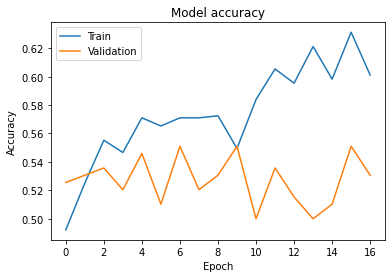

In [74]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

As can be seen from the graph - the model still tends to overfit. This figure shows that the train accuracy increases with number of epochs, while the validation accuracy just keeps flactuating. This indicates that model is unable to generalise on unseen data.